<div style="width: 100%; clear: both;">
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M0.536 - Simulación</p>
<p style="margin: 0; text-align:right;">MU Ingeniería Informática / MU Ingeniería Computacional y Matemática</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# _Define clearly the goals of the analysis, explain why you will develop the model, and prepare the Validation and Verification process you will follow._

Los siguientes son algunos objetivos posibles del análisis:

* Comprender la propagación del virus SARS-CoV-2 en un área geográfica específica: el modelo SEIRD puede ayudar a comprender la propagación del virus a lo largo del tiempo, identificar los factores clave de la propagación.

* Predecir la futura propagación del virus: al simular diferentes escenarios, el modelo puede ayudar a predecir la futura propagación del virus y el impacto potencial de diferentes intervenciones de salud pública.

* Evaluación de la efectividad de las intervenciones de salud pública: el modelo se puede utilizar para evaluar la efectividad de diferentes estrategias de salud pública, como medidas de distanciamiento social, programas de vacunación y otros.

Es importante desarrollar el modelo para obtener información sobre la propagación del virus y para informar la toma de decisiones con respecto a las intervenciones de salud pública.

El proceso de validación y verificación debe estar diseñado para garantizar la precisión y confiabilidad del modelo. Este proceso puede incluir los siguientes pasos:

Validación del modelo: comparar las predicciones del modelo con datos del mundo real para determinar la precisión del modelo. Para este paso podemos utilizar los [datos de la pandemia del Coronavirus de la Organización Mundial de la Salud (OMS)](https://ourworldindata.org/coronavirus)

Verificación del modelo: Asegurar que el modelo esté implementado correctamente y que los resultados no se deban a errores o bugs en la implementación.

Análisis de sensibilidad: Se realiza un análisis la sensibilidad del modelo a diferentes parámetros de entrada para determinar la solidez del modelo.

Validación externa: Se trata de comparar los resultados del modelo con los de otros modelos, estudios o terceras personas para evaluar la consistencia de los resultados.

# _Develop a conceptual model of the proposed system. Define the hypotheses you use, and simplify the model if needed. The goal is to analyze the status of the hospital. We want to optimize the number of doctors in all the services to provide a good service. What if the doctors can provide service to any patient?_

El modelo conceptual del sistema propuesto puede ser el siguiente:

| Componente | Descripción  |
|:-:|---|
| Población  | Tamaño de la población (N)  |
| Latency Rate  | Período de incubación de expuesto a infectado (alpha) |
| Contact Rate  | Período de transmisión de infectado a susceptible (beta) |
| Recovery Rate  | Tasa de recuperación (gamma) |
| Mortality Rate  | Tasa de mortalidad (mu) |


Inputs: Los inputs al modelo incluyen los componentes anteriormente mencionados y los siguientes inputs
        
| Input  | Descripción |
|:-:|---|
| S0  | Número inicial de población susceptible |
| E0  | Número inicial de población expuesta |
| I0  | Número inicial de población infectada |
| R0  | Número inicial de población recuperada |
| D0  | Número inicial de muertos |
| time  | Tiempo en el que transcurre la simulación |


Outputs: La salida del modelo es un gráfico donde se ve cómo evolucionan los distintos segmentos de la población en diferentes colores a lo largo del tiempo.

Suposiciones: 

* Los médicos pueden otorgar cualquier servicio a cualquier paciente.
* Los casos de muertes son debido al COVID y no por otras causas.
* No existe un nivel pre-existente de inmunización

Simplificaciones: Este modelo se ha desarrollado utilizando Python y librerías simples de gráficos. Además, la parametrización del modelo se hace manualmente, no se pueden añadir nuevas poblaciones y los valores iniciales son estáticos.

Tomamos las siguientes hipótesis para simplificar el modelo:

* Los médicos pueden brindar servicio a cualquier paciente, independientemente del estado en el que se encuentren.
* El número de pacientes en cada servicio es constante.
* El tiempo requerido para tratar a un paciente es el mismo para todos los pacientes.

El modelo conceptual se puede simplificar aún más suponiendo que todos los pacientes de un servicio tienen la misma prioridad y que el tiempo necesario para tratar a un paciente es el mismo para todos los pacientes. Esta simplificación puede ayudar a reducir la complejidad del modelo y brindar una imagen más clara del estado del hospital.

## _Logic Flow_

![logic.drawio.png](logic.drawio.png)

# _Code the model_

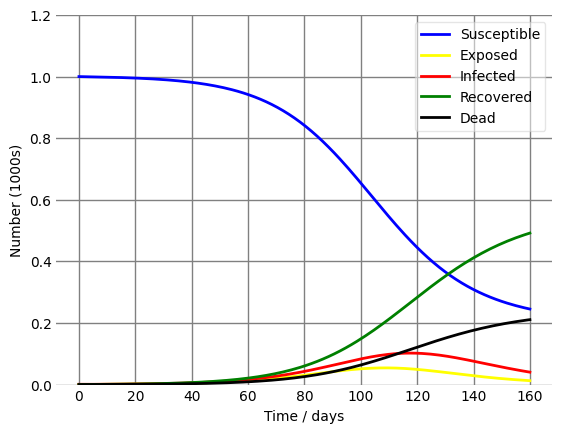

In [107]:
# %load simulation.py
#!/usr/bin/env python
import matplotlib.pyplot as plt

from numpy import linspace
from scipy.integrate import odeint


class Params:
    def __init__(self, N, S, E, I, R, D, alpha, beta, gamma, mu, time):
        self.N = N
        self.S0 = S
        self.E0 = E
        self.I0 = I
        self.R0 = R
        self.D0 = D
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.mu = mu
        self.time = time


def plot(S, E, I, R, D, t, N, title=None):
    """
    Plot the SEIRD model results.

    Parameters
    ----------
    S: numpy array
        Susceptible population
    E: numpy array
        Exposed population
    I: numpy array
        Infected population
    R: numpy array
        Recovered population
    D: numpy array
        Dead population
    time: numpy array
        Time steps
    N: int
        Total population

    Returns
    -------
    None
    """
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111, facecolor='#ffffff', axisbelow=True)
    ax.set_title(title)
    ax.plot(t, S/N, 'blue', lw=2, label='Susceptible')
    ax.plot(t, E/N, 'yellow', lw=2, label='Exposed')
    ax.plot(t, I/N, 'red', lw=2, label='Infected')
    ax.plot(t, R/N, 'green', lw=2, label='Recovered')
    ax.plot(t, D/N, 'black', lw=2, label='Dead')

    ax.set_xlabel('Time / days')
    ax.set_ylabel(f'Number ({N}s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(c='gray', lw=1, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()


def simulate(params):
    """
    Simulate the SEIRD model.

    Parameters
    ----------
    params: Params object
        Model parameters

    Returns
    -------
    Tuple[numpy array]
        Tuple of numpy arrays (S, E, I, R, D) representing the populations
    """
    N = params.N
    y0 = params.S0, params.E0, params.I0, params.R0, params.D0
    alpha, beta, gamma, mu = params.alpha, params.beta, params.gamma, params.mu
    time = params.time


    def deriv(y, t, N, alpha, beta, gamma, mu):
        """
        Calculate the time derivatives of the variables in a compartmental model of disease spread.

        Parameters:
            y (list or array): the values of the variables at time t, in the order [S, E, I, R, D].
            t (float): the time at which the derivatives are being calculated.
            N (int): the total population size.
            alpha (float): the rate at which exposed individuals become infected.
            beta (float): the rate of disease transmission from infected individuals to susceptible individuals.
            gamma (float): the rate of recovery for infected individuals.
            mu (float): the rate of mortality for infected individuals.

        Returns:
            tuple: the time derivatives of S, E, I, R, and D.
        """
        S, E, I, R, D = y
        dSdt = -beta * S * I / N
        dEdt = (beta * S * I / N) - alpha * E
        dIdt = alpha * E - gamma * I
        dRdt = gamma * (1 - mu) * I
        dDdt = gamma * mu * I
        return dSdt, dEdt, dIdt, dRdt, dDdt


    # Integrate the SEIRD equations over the time grid
    ret = odeint(deriv, y0, time, args=(N, alpha, beta, gamma, mu))
    # S, E, I, R, D = ret.T
    return ret.T


# the whole population is initially susceptible
N = S0 = 1000
E0, I0, R0, D0 = 0, 1, 0, 0
# latency rate, contact rate and recovery rate
alpha, beta, gamma, mu = 0.2, 0.2, 1.0/10, 0.3
# time grid measured in days
# Return evenly spaced numbers over a specified interval.
time = linspace(0, 160, 160) 
params = Params(N, S0, E0, I0, R0, D0, alpha, beta, gamma, mu, time)
results = simulate(params)
plot(*results, time, N)

Como se puede observar, a lo largo del tiempo (160 días) las personas susceptibles han ido disminuyendo mientras que los demás grupos han ido aumentando. Las personas expuestas tienen una curva muy suave ya que de este estado se pasa rápidamente a infectado. La curva de infectado es también muy suave, con un comportamiento muy parecido a la de los expuestos. La curva de recuperados es bastante pronunciada al final, siendo esta la que aglutina los casos de infectados. Finalmente, la curva de muertos viene dada por casos de infectados que no han tenido tanta suerte como los recuperdos y podemos observar que es bastante similar a la de recuperados pero menos acentuada.

## _Model Validation_

La validación del modelo se puede hacer consultando los datos oficiales de la pandemia en [](https://ourworldindata.org/coronavirus). Esta página contiene un vastísimo conjunto de datos relativos a la pandemia, para nuestra validación nos centraremos en los datos de España durante los 3 primeros meses de la pandemia.

Debido a que el modelo desarrollado no tiene exactamente un conjunto de datos o curvas en los datos de la OMS compararemos el modelo con los casos de Casos confirmados (OMS) con los Infectados y Muertes confirmadas (OMS) con Muertes.

![coronavirus-data-explorer1.png](coronavirus-data-explorer1.png)



En nuestro modelo, la curva de infectados no es tan acentuada al principio, sin embargo, sí que sigue una progresión similar donde parece llegar a un máximo para luego bajar lentamente.

![coronavirus-data-explorer.png](coronavirus-data-explorer.png)

De igual manera que en el caso anterior, la curva de muertes de nuestro modelo no es tan acentuada al principio, de hecho, es la menos pronuncidada. Al igual que el caso anterior de infectados, la curva de muertes llega a un máximo para luego estabilizarse, sin embargo, para el tiempo que hemos analizado nuestro modelo, esta parece seguir creciendo al contrario que esta. En el siguiente apartado veremos curvas más similares a la de la OMS respecto a la mortalidad si variamos algunas variables.

## _Análisis de sensibilidad_

En el análisis de sensibilidad se evalúan las consecuencias de los cambios en las entradas del modelo. Las entradas a estudiar serán los componentes del mismo, recordemos:


| Componente | Descripción  |
|:-:|---|
| Población  | Tamaño de la población (N)  |
| Latency Rate  | Período de incubación de expuesto a infectado (alpha) |
| Contact Rate  | Período de transmisión de infectado a susceptible (beta) |
| Recovery Rate  | Tasa de recuperación (gamma) |
| Mortality Rate  | Tasa de mortalidad (mu) |


### _Población_

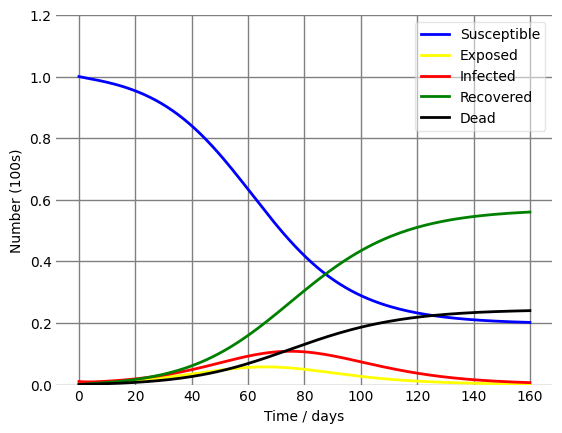

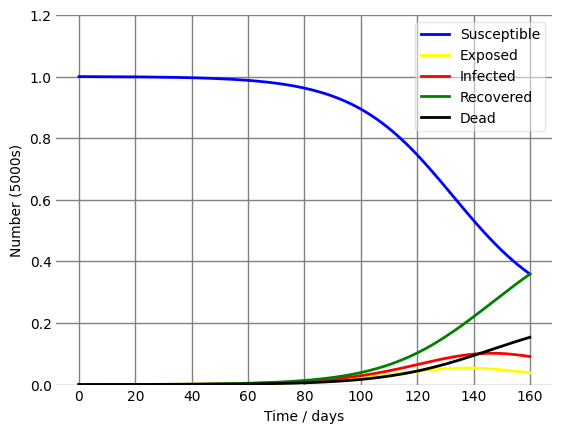

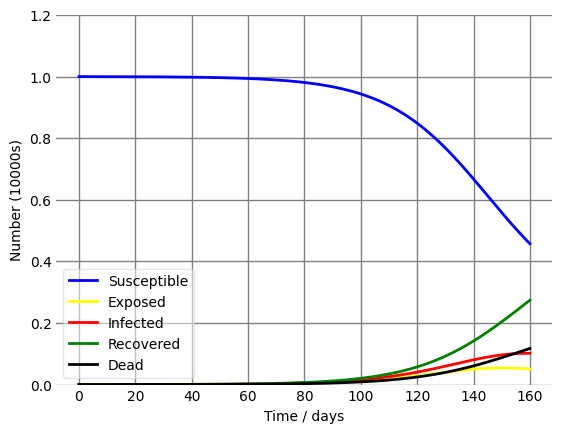

In [108]:
populations = [100, 5000, 10000]

for N in populations:
    S0 = N
    params = Params(N, S0, E0, I0, R0, D0, alpha, beta, gamma, mu, time)
    results = simulate(params)
    plot(*results, time, N)

# restore values
N = S0 = 1000
# latency rate, contact rate and recovery rate
alpha, beta, gamma, mu = 0.2, 0.2, 1.0/10, 0.3

Vemos que en todos los casos las curvas siguen las mismas progresiones, solo que en diferentes puntos de tiempo.

### _Latency Rate_

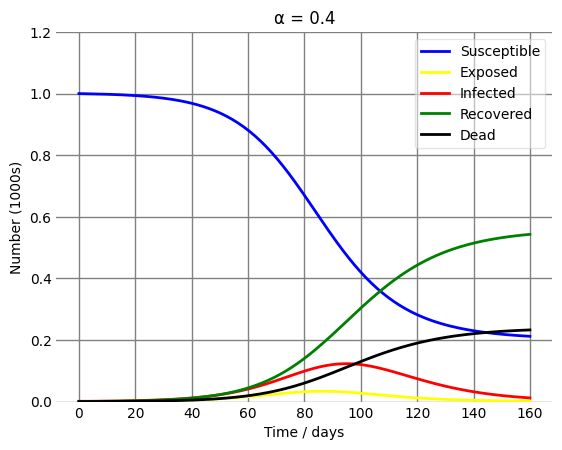

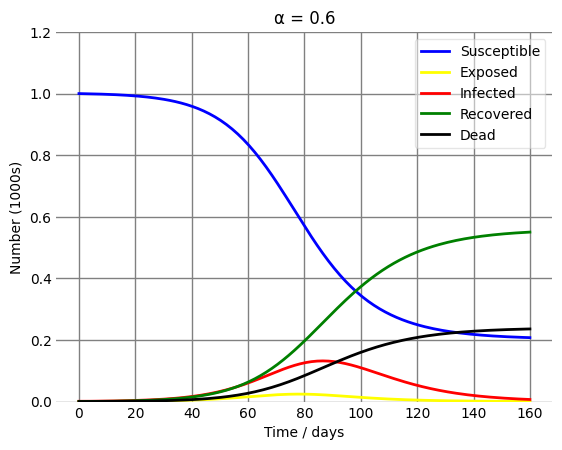

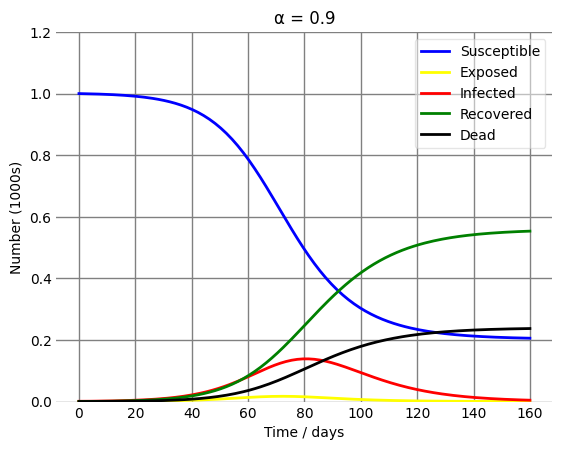

In [109]:
latency_rates = [0.4, 0.6, 0.9]

for alpha in latency_rates:
    params = Params(N, S0, E0, I0, R0, D0, alpha, beta, gamma, mu, time)
    results = simulate(params)
    plot(*results, time, N, title=f"α = {alpha}")

# restore values
N = S0 = 1000
# latency rate, contact rate and recovery rate
alpha, beta, gamma, mu = 0.2, 0.2, 1.0/10, 0.3

En este caso, vemos que el período de incubación influye en la rapidez en que se forman las curvas, por ejemplo, si observamos la curva de infectados vemos que esta llega al máximo el día 80 cuando el rate es de 0.9, en cambio, en otros casos se llega a los mismos valores pero más tarde

### _Transmission Rate_

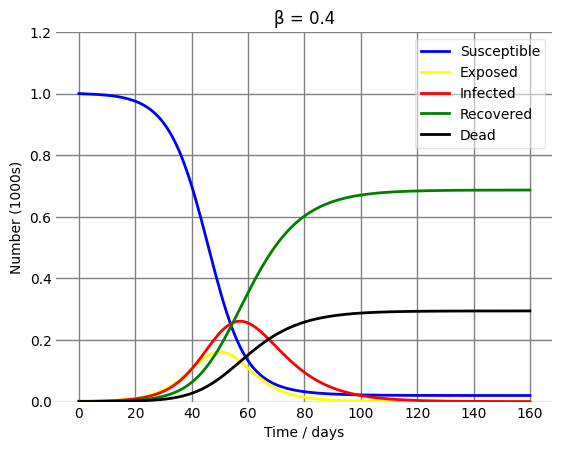

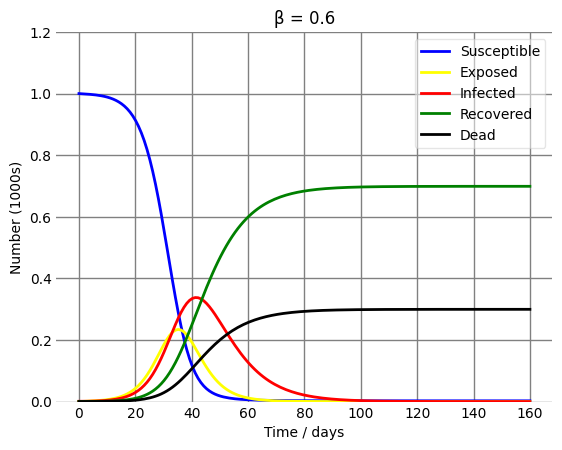

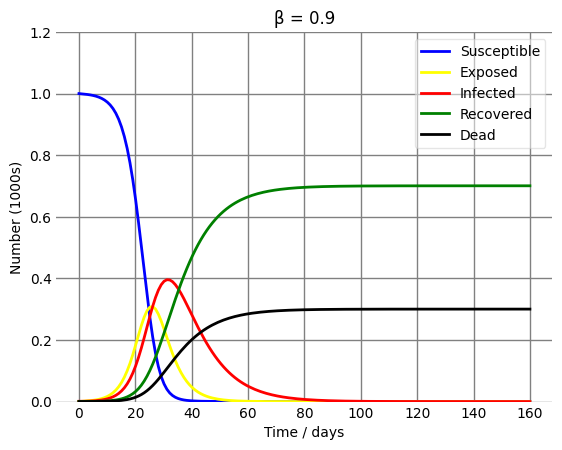

In [110]:
transmission_rates = [0.4, 0.6, 0.9]

for beta in transmission_rates:
    params = Params(N, S0, E0, I0, R0, D0, alpha, beta, gamma, mu, time)
    results = simulate(params)
    plot(*results, time, N, title=f"β = {beta}")
    
# restore values
N = S0 = 1000
# latency rate, contact rate and recovery rate
alpha, beta, gamma, mu = 0.2, 0.2, 1.0/10, 0.3

El modelo es sensible a esta variable, como podemos observar en los resultados obtenidos. Cuanta más alta la transmissión se llega mucho antes a los valores típicos de las curvas. Vemos además, cómo todas las curvas se acentúan, especialmente las tasa de infectados y expuestos.

### _Recovery Rate_

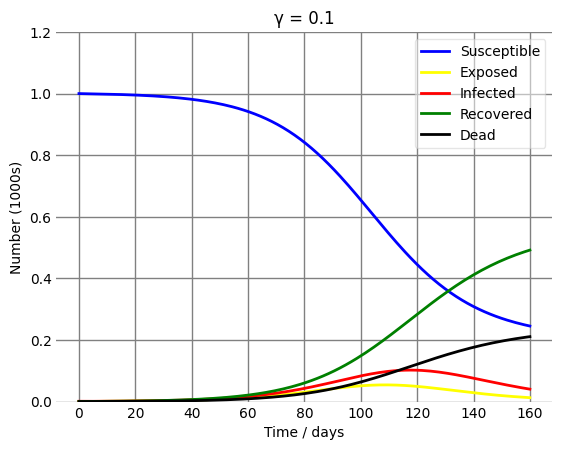

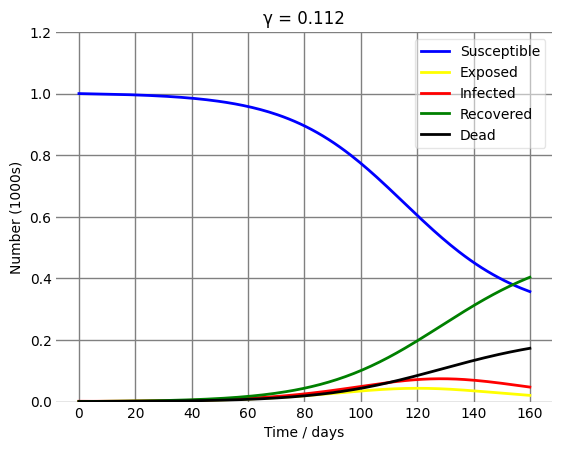

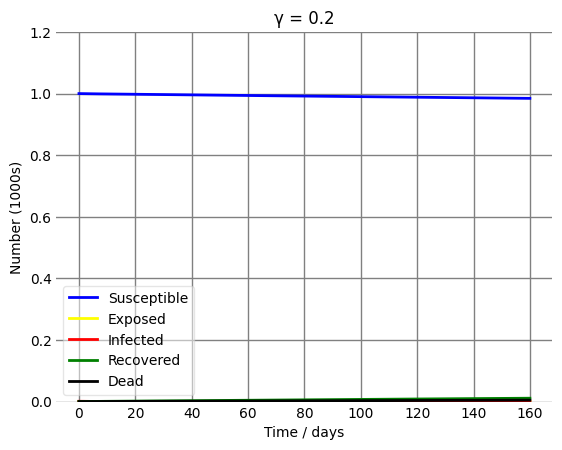

In [111]:
recovery_rates = [0.1, 0.112, 0.2]

for gamma in recovery_rates:
    params = Params(N, S0, E0, I0, R0, D0, alpha, beta, gamma, mu, time)
    results = simulate(params)
    plot(*results, time, N, title=f"γ = {gamma}")
    
# restore values
N = S0 = 1000
# latency rate, contact rate and recovery rate
alpha, beta, gamma, mu = 0.2, 0.2, 1.0/10, 0.3

El modelo también es especialmente sensible a este valor. Cuanto más alta es la tasa de recuperación la curva de susceptibles disminuye considerablemente y las demás tiene valores muy bajos, como cabría esperar.
Es interesante ver cómo esta variable es tan sensible que para valores cercanos a 0.2 tendría que extenderse mucho más en el tiempo la gráfica para ver resultados notables.

### _Mortality Rate_

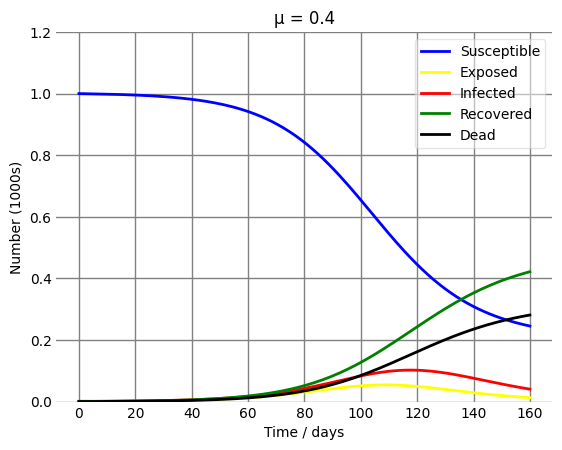

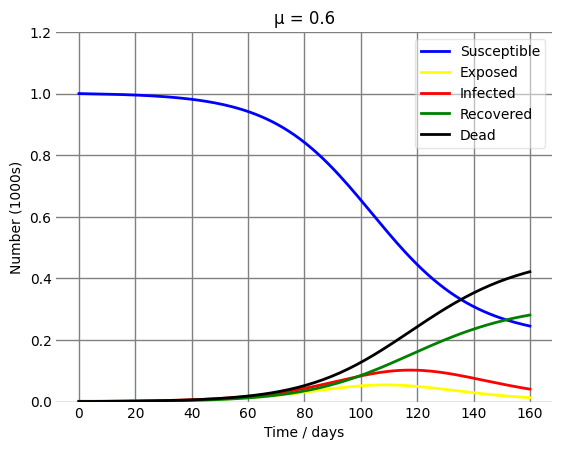

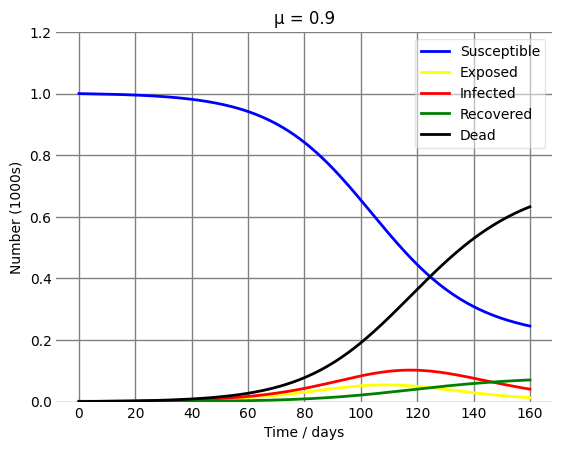

In [112]:
mortality_rates = [0.4, 0.6, 0.9]

for mu in mortality_rates:
    params = Params(N, S0, E0, I0, R0, D0, alpha, beta, gamma, mu, time)
    results = simulate(params)
    plot(*results, time, N, title=f"μ = {mu}")

# restore values
N = S0 = 1000
# latency rate, contact rate and recovery rate
alpha, beta, gamma, mu = 0.2, 0.2, 1.0/10, 0.3

El modelo también parece sensible a esta variable. Si la tasa de mortalidad es muy alta parece que los infectados no tienen tiempo a recuperarse y la curva de mortalidad sustituye a la de recuperados en otros modelos con una tasa de mortalidad más optimista